# HW4 - Data Analysis & Make Prediction Models

#### Data Science in Korea University, Prof. Jaewoo Kang
#### COSE471, Spring 2020
#### Due : 7/01 (wednes)  11:59 PM [Through Black board]

## Assignment Credit

### Your assignments are 40% of the total score. The scores for each assignment are as follows.
- __HW#1: 5%__
- __HW#2: 10%__
- __HW#3: 10%__
- __HW#4: 15%__

## Python Assingment HW4 Guide
- You need to fill out your code in ###YOUR CODE HERE### or #TODO.
- The code results should be the same as the results displayed below the code or the format we gave in problem description.
- When solving descriptive problems, both __Korean and English are available.__
- The some libraries are already imported below. __But you should import more.__
    - If you don't have some libraries, install it with pip or conda command. [Google will help you]

## Problem1. Scikit-learn
- Scikit-learn is the most common python library in machine learning.
- Let's port our work from matplotlib to scikit-learn.
- However, not all plots will be handled. We will focus on the most recent data, 2010-2015.

<b>URL:</b> http://scikit-learn.org/
<br/><b>Install guide:</b> http://scikit-learn.org/stable/install.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import time
from datetime import datetime
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import nltk
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Problem1. Regression Model
## -Amzon stock price prediction.

### Problem 1-1
- In this problem you will predict stock price only with price related data. People usually call it as Technical analysis.
- Find best combination of parameters to predict next day price.
- __Your MSE loss should be lower than 30.__

In [133]:
# TODO : load data 'AMZN.csv'
raw_data =pd.read_csv('data\AMZN.csv')


In [134]:
raw_data.head()
#raw_data = raw_data[raw_data['Date'].str.match('201')]
raw_data.set_index('Date',drop=True,inplace=True)
raw_data


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200
...,...,...,...,...,...,...
2018-05-14,1604.000000,1611.180054,1600.050049,1601.540039,1601.540039,2509500
2018-05-15,1587.800049,1587.800049,1565.219971,1576.119995,1576.119995,5077500
2018-05-16,1577.500000,1594.430054,1576.670044,1587.280029,1587.280029,2570600


<br/><br/>
- We will use only __one kind of variable__ for __last 'lookback' days__ to predict next day close price.<br/>
For example, if we set lookback days as 5, and use close price for our independent variable.<br/><br/>
Close price of [1997-05-15, 1997-05-16, 1997-05-19, 1997-05-20, 1997-05-21] --> predict [1997-05-22] <br/><br/>

In [135]:
"""
TODO : make get_concated_data function.
       this function create x and y data

@Function
get_concated_data

@Inputs
__
raw_data : dataframe, full Amazon stock data.
     

@Returns
___

x_data 
    : <class 'numpy.ndarray'>
    : crteated data should in shape of [len(raw_data)-lookback, lookback]
    : x_data should be made based on 'col_name', parameters of the function, variable we will use
    
y_data 
    : <class 'numpy.ndarray'>
    : crteated data should in shape of [len(raw_data)-lookback]
    : y should be always made based on 'Close'.
"""

"\nTODO : make get_concated_data function.\n       this function create x and y data\n\n@Function\nget_concated_data\n\n@Inputs\n__\nraw_data : dataframe, full Amazon stock data.\n     \n\n@Returns\n___\n\nx_data \n    : <class 'numpy.ndarray'>\n    : crteated data should in shape of [len(raw_data)-lookback, lookback]\n    : x_data should be made based on 'col_name', parameters of the function, variable we will use\n    \ny_data \n    : <class 'numpy.ndarray'>\n    : crteated data should in shape of [len(raw_data)-lookback]\n    : y should be always made based on 'Close'.\n"

In [136]:
# We will use only one kind of variable as a time series data
def get_concated_data(raw_data, col_name, lookback):
    x_datas = list()
    y_datas = list()
    # col_name : Variable to be used
    col_data = raw_data[col_name].values
    # aggregate target variable data for length of lookback days
    
    x_datas = [[0 for _ in range(lookback)] for _ in range(len(raw_data)-lookback)]
       
    for i in range(len(raw_data)-lookback):
        x_datas[i]=col_data[i:i+lookback]
        
   
    y_datas=raw_data['Close'].values
    y_datas=y_datas[lookback:]
   ##########################
    x_data = np.asarray(x_datas)
#    x_data = np.concatenate(x_datas,0)
    y_data = np.asarray(y_datas)

    return x_data, y_data

In [137]:
"""
TODO : make split_data function which split train / test (last 60 data, approximately 3 month)

@Function
split_datas

@Inputs
__
data : numpy array
     
@Returns
___
x_train, x_test, y_train, y_test
    :<class 'numpy.ndarray'>

"""

"\nTODO : make split_data function which split train / test (last 60 data, approximately 3 month)\n\n@Function\nsplit_datas\n\n@Inputs\n__\ndata : numpy array\n     \n@Returns\n___\nx_train, x_test, y_train, y_test\n    :<class 'numpy.ndarray'>\n\n"

In [159]:
def split_datas(x,y):
    ##### Your Code Here ####
    #head함수 말고 바꾸기
    x_test=x[-1260:-1200]
    x_train=x[:-1260]
    y_test=y[-1260:-1200]
    y_train=y[:-1260]
    ###########################
    return x_train, x_test, y_train, y_test

In [160]:
x, y = get_concated_data(raw_data,'Close', 5)
x[:10], y[:10]

(array([[1.958333, 1.729167, 1.708333, 1.635417, 1.427083],
        [1.729167, 1.708333, 1.635417, 1.427083, 1.395833],
        [1.708333, 1.635417, 1.427083, 1.395833, 1.5     ],
        [1.635417, 1.427083, 1.395833, 1.5     , 1.583333],
        [1.427083, 1.395833, 1.5     , 1.583333, 1.53125 ],
        [1.395833, 1.5     , 1.583333, 1.53125 , 1.505208],
        [1.5     , 1.583333, 1.53125 , 1.505208, 1.5     ],
        [1.583333, 1.53125 , 1.505208, 1.5     , 1.510417],
        [1.53125 , 1.505208, 1.5     , 1.510417, 1.479167],
        [1.505208, 1.5     , 1.510417, 1.479167, 1.416667]]),
 array([1.395833, 1.5     , 1.583333, 1.53125 , 1.505208, 1.5     ,
        1.510417, 1.479167, 1.416667, 1.541667]))

In [161]:
x_train, x_test, y_train, y_test = split_datas(x, y)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((4023, 5), (4023,), (60, 5), (60,))

### <br/>Problem 1-2 Find best parameter combination 
- You can choose which __columns to use__ as variable for __how many days__, and in which __polynomial space.__
- Find the best combination of parameters to predict next day price.
- __Find combination which makes MSE loss for train data lower than 6.__

In [162]:
# TODO : complete run_regression function
# Hint : use api i gave below

In [163]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

def run_regression(raw_data, column_name, lookback_days, poly_degree):
    # performing regression analysis with specified parameters
    x, y = get_concated_data(raw_data, column_name, lookback_days)
    x_train, x_test, y_train, y_test = split_datas(x, y)

    ##### Your Code Here ####
    poly = PolynomialFeatures(degree=poly_degree, include_bias = False)
    X_train = poly.fit_transform(x_train)
    X_test = poly.fit_transform(x_test)
    
    y_train=y_train.reshape(-1,1)
    y_test=y_test.reshape(-1,1)
#    y_train = poly.fit_transform(y_train)
#    y_test = poly.fit_transform(y_test)
    
    model=LinearRegression()
    model.fit(X_train,y_train)
    
    
    test_pred=model.predict(X_test)
    
    
    ########################
    print ("MSE - Train %.4f"%mean_squared_error(model.predict(X_train), y_train))
    print ("MSE - Test %.4f"%mean_squared_error(model.predict(X_test), y_test))
    
    return test_pred, y_test

In [164]:
# TODO : run experiment with various combination
test_pred, y_test = run_regression(raw_data, column_name='Close', lookback_days=11, poly_degree=3)

MSE - Train 5.3385
MSE - Test 24.6291


Write Combination that you've found. (Train loss lower than 6) <br/><br/>
Variable : x_test=x[-1060:-1000]/x_train=x[:-1060]/y_test=y[-1060:-1000]/y_train=y[:-1060]      <br/>
Lookback : 11      <br/>
Poly_degree : 3      <br/>

### Problem 1-3 Overfitting & Underfitting
1. Briefly explain about the concept of overfitting and underftting with proper example that you can find from experiment above.
2. In the above problem desciption, I set your goal as fiding best parameters for total data loss. What is wrong with it? 

1. 
Overfitting is that Variance is error from sensitivity to small fluctuations in the train set. 즉, train set에 너무 맞춰져 train set의 noise까지 learn 하려 하는 model이 too complex한 형태이다. 
Underfitting is that Bias is error from erroneous assumptions in the model, like making it linear. 즉, train에 지나치게 맞추지 않고, 2차를 1차에 끼워맞추는 식으로 하여 error가 많이 발생하는 형태이다.
이 example에서는 Train MSE를 과도하게 줄이려 하는 나머지 train set의 MSE는 5.9인 반면, test set의 MSE는 24로 balance가 맞지 않게 나왔다. 이 말인즉슨, train set을 가지고 linear regression을 실험해 보았을 때는 6만큼의 오차밖에 발생하지 않지만, 새로운 data set인 test set을 가지고 linear regression을 실험하면 오차가 24까지 벌어진다는 뜻이다. 이 문항에서, MSE가 30이하인 조건과 train loss가 6 이하인 조건을 맞추기 위해 variable을 과도하게 조절하였지만 variable을 조정하지 않았을 때 overfit되는 경향은 더욱 극단적으로 나타났다.
2. 
total data loss를 줄이기 위해, lookback과 poly_degree에 다양한 값을 넣어 조절하였다. 무엇보다 문제인 것은 이 두가지 값의 조절로는 total data loss를 30이하로 절대 줄일 수 없어, variable에서 다소 높은 값들이 나오는 4000번째 이후 값들을 삭제했고, 또한 2010년 - 2015년의 data 대신 전 연도의 data를 사용하였다. 즉 MSE를 낮추기 위한 variable의 과도한 조작이 문제적이라고 생각한다.

### Problem 1-4 Visualization
- Visualize your predicton.
- You can use code below with proper variable.
- __Your best model's prediction --> best_pred.__

In [165]:
# TODO : Assign your best prediction for test data to best_pred

best_pred = run_regression(raw_data, column_name='Close', lookback_days=11, poly_degree=3)

MSE - Train 5.3385
MSE - Test 24.6291


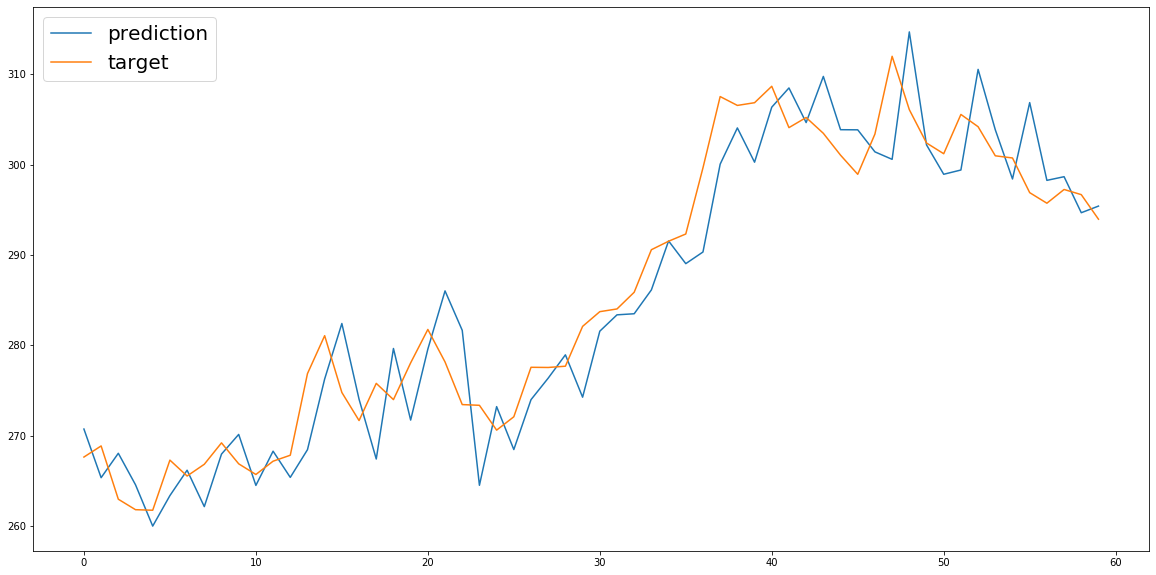

In [166]:
from matplotlib import pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(test_pred, label='prediction')#best_pred로 바꿔야 함
plt.plot(y_test, label='target')
plt.legend(loc='best', fontsize=20)
plt.show()

## Problem2. Regression Model
## -Covid Confirmed prediction.

In [167]:
#import covidall dataset 
train = pd.read_csv('data/train.csv')
all_data = pd.read_csv('data/covid_all.csv') #set your working directory
all_data

,Unnamed: 0,index,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities,ForecastId,Day_num,...,Trend_Fatalities_2,Trend_Fatalities_3,Trend_Fatalities_4,Trend_Fatalities_5,Trend_Fatalities_6,Population (2020),Density,Land Area,Med Age,Urban Pop
0,0,0,1.0,83,0,2020-01-22,0.0,0.0,-1.0,0,...,0.0,0.0,0.0,0.0,0.0,38742911.0,60.0,652860.0,18.0,25.0
1,1,1,2.0,83,0,2020-01-23,0.0,0.0,-1.0,1,...,0.0,0.0,0.0,0.0,0.0,38742911.0,60.0,652860.0,18.0,25.0
2,2,2,3.0,83,0,2020-01-24,0.0,0.0,-1.0,2,...,0.0,0.0,0.0,0.0,0.0,38742911.0,60.0,652860.0,18.0,25.0
3,3,3,4.0,83,0,2020-01-25,0.0,0.0,-1.0,3,...,0.0,0.0,0.0,0.0,0.0,38742911.0,60.0,652860.0,18.0,25.0
4,4,4,5.0,83,0,2020-01-26,0.0,0.0,-1.0,4,...,0.0,0.0,0.0,0.0,0.0,38742911.0,60.0,652860.0,18.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35677,35677,13454,-1.0,83,183,2020-05-10,0.0,0.0,13455.0,109,...,0.0,0.0,0.0,0.0,0.0,14818157.0,38.0,386850.0,19.0,38.0
35678,35678,13455,-1.0,83,183,2020-05-11,0.0,0.0,13456.0,110,...,0.0,0.0,0.0,0.0,0.0,14818157.0,38.0,386850.0,19.0,38.0
35679,35679,13456,-1.0,83,183,2020-05-12,0.0,0.0,13457.0,111,...,0.0,0.0,0.0,0.0,0.0,14818157.0,38.0,386850.0,19.0,38.0
35680,35680,13457,-1.0,83,183,2020-05-13,0.0,0.0,13458.0,112,...,0.0,0.0,0.0,0.0,0.0,14818157.0,38.0,386850.0,19.0,38.0


In [168]:
country_dict = {'Afghanistan': 0,
 'Albania': 1,
 'Algeria': 2,
 'Andorra': 3,
 'Angola': 4,
 'Antigua and Barbuda': 5,
 'Argentina': 6,
 'Armenia': 7,
 'Australia': 8,
 'Austria': 9,
 'Azerbaijan': 10,
 'Bahamas': 11,
 'Bahrain': 12,
 'Bangladesh': 13,
 'Barbados': 14,
 'Belarus': 15,
 'Belgium': 16,
 'Belize': 17,
 'Benin': 18,
 'Bhutan': 19,
 'Bolivia': 20,
 'Bosnia and Herzegovina': 21,
 'Botswana': 22,
 'Brazil': 23,
 'Brunei': 24,
 'Bulgaria': 25,
 'Burkina Faso': 26,
 'Burma': 27,
 'Burundi': 28,
 'Cabo Verde': 29,
 'Cambodia': 30,
 'Cameroon': 31,
 'Canada': 32,
 'Central African Republic': 33,
 'Chad': 34,
 'Chile': 35,
 'China': 36,
 'Colombia': 37,
 'Congo (Brazzaville)': 38,
 'Congo (Kinshasa)': 39,
 'Costa Rica': 40,
 "Cote d'Ivoire": 41,
 'Croatia': 42,
 'Cuba': 43,
 'Cyprus': 44,
 'Czechia': 45,
 'Denmark': 46,
 'Diamond Princess': 47,
 'Djibouti': 48,
 'Dominica': 49,
 'Dominican Republic': 50,
 'Ecuador': 51,
 'Egypt': 52,
 'El Salvador': 53,
 'Equatorial Guinea': 54,
 'Eritrea': 55,
 'Estonia': 56,
 'Eswatini': 57,
 'Ethiopia': 58,
 'Fiji': 59,
 'Finland': 60,
 'France': 61,
 'Gabon': 62,
 'Gambia': 63,
 'Georgia': 64,
 'Germany': 65,
 'Ghana': 66,
 'Greece': 67,
 'Grenada': 68,
 'Guatemala': 69,
 'Guinea': 70,
 'Guinea-Bissau': 71,
 'Guyana': 72,
 'Haiti': 73,
 'Holy See': 74,
 'Honduras': 75,
 'Hungary': 76,
 'Iceland': 77,
 'India': 78,
 'Indonesia': 79,
 'Iran': 80,
 'Iraq': 81,
 'Ireland': 82,
 'Israel': 83,
 'Italy': 84,
 'Jamaica': 85,
 'Japan': 86,
 'Jordan': 87,
 'Kazakhstan': 88,
 'Kenya': 89,
 'Korea, South': 90,
 'Kosovo': 91,
 'Kuwait': 92,
 'Kyrgyzstan': 93,
 'Laos': 94,
 'Latvia': 95,
 'Lebanon': 96,
 'Liberia': 97,
 'Libya': 98,
 'Liechtenstein': 99,
 'Lithuania': 100,
 'Luxembourg': 101,
 'MS Zaandam': 102,
 'Madagascar': 103,
 'Malawi': 104,
 'Malaysia': 105,
 'Maldives': 106,
 'Mali': 107,
 'Malta': 108,
 'Mauritania': 109,
 'Mauritius': 110,
 'Mexico': 111,
 'Moldova': 112,
 'Monaco': 113,
 'Mongolia': 114,
 'Montenegro': 115,
 'Morocco': 116,
 'Mozambique': 117,
 'Namibia': 118,
 'Nepal': 119,
 'Netherlands': 120,
 'New Zealand': 121,
 'Nicaragua': 122,
 'Niger': 123,
 'Nigeria': 124,
 'North Macedonia': 125,
 'Norway': 126,
 'Oman': 127,
 'Pakistan': 128,
 'Panama': 129,
 'Papua New Guinea': 130,
 'Paraguay': 131,
 'Peru': 132,
 'Philippines': 133,
 'Poland': 134,
 'Portugal': 135,
 'Qatar': 136,
 'Romania': 137,
 'Russia': 138,
 'Rwanda': 139,
 'Saint Kitts and Nevis': 140,
 'Saint Lucia': 141,
 'Saint Vincent and the Grenadines': 142,
 'San Marino': 143,
 'Sao Tome and Principe': 144,
 'Saudi Arabia': 145,
 'Senegal': 146,
 'Serbia': 147,
 'Seychelles': 148,
 'Sierra Leone': 149,
 'Singapore': 150,
 'Slovakia': 151,
 'Slovenia': 152,
 'Somalia': 153,
 'South Africa': 154,
 'South Sudan': 155,
 'Spain': 156,
 'Sri Lanka': 157,
 'Sudan': 158,
 'Suriname': 159,
 'Sweden': 160,
 'Switzerland': 161,
 'Syria': 162,
 'Taiwan*': 163,
 'Tanzania': 164,
 'Thailand': 165,
 'Timor-Leste': 166,
 'Togo': 167,
 'Trinidad and Tobago': 168,
 'Tunisia': 169,
 'Turkey': 170,
 'US': 171,
 'Uganda': 172,
 'Ukraine': 173,
 'United Arab Emirates': 174,
 'United Kingdom': 175,
 'Uruguay': 176,
 'Uzbekistan': 177,
 'Venezuela': 178,
 'Vietnam': 179,
 'West Bank and Gaza': 180,
 'Western Sahara': 181,
 'Zambia': 182,
 'Zimbabwe': 183}

### <br/>Problem 2-1 Plot ' Spain' covid-Confiremedcases graph between march 1 to march 11.
- your completed graph doesn't have to be the same as the example.

In [173]:
Spain=all_data[all_data['Country_Region']==156]

SpainMarch=Spain[Spain['Month']==3]
SpainMarch=SpainMarch[SpainMarch['Day_num']>=39]
SpainMarch=SpainMarch[SpainMarch['Day_num']<=49]

SpainMarch

,Unnamed: 0,index,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities,ForecastId,Day_num,...,Trend_Fatalities_2,Trend_Fatalities_3,Trend_Fatalities_4,Trend_Fatalities_5,Trend_Fatalities_6,Population (2020),Density,Land Area,Med Age,Urban Pop
15801,15801,25569,25570.0,83,156,2020-03-01,84.0,0.0,-1.0,39,...,0.000000,0.000000,0.000000,0.000000,0.0,46751175.0,94.0,498800.0,45.0,80.0
15802,15802,25570,25571.0,83,156,2020-03-02,120.0,0.0,-1.0,40,...,0.000000,0.000000,0.000000,0.000000,0.0,46751175.0,94.0,498800.0,45.0,80.0
15803,15803,25571,25572.0,83,156,2020-03-03,165.0,1.0,-1.0,41,...,0.000000,0.000000,0.000000,0.000000,0.0,46751175.0,94.0,498800.0,45.0,80.0
15804,15804,25572,25573.0,83,156,2020-03-04,222.0,2.0,-1.0,42,...,0.000000,0.000000,0.000000,0.000000,0.0,46751175.0,94.0,498800.0,45.0,80.0
15805,15805,25573,25574.0,83,156,2020-03-05,259.0,3.0,-1.0,43,...,2.000000,0.000000,0.000000,0.000000,0.0,46751175.0,94.0,498800.0,45.0,80.0
15806,15806,25574,25575.0,83,156,2020-03-06,400.0,5.0,-1.0,44,...,1.500000,4.000000,0.000000,0.000000,0.0,46751175.0,94.0,498800.0,45.0,80.0
15807,15807,25575,25576.0,83,156,2020-03-07,500.0,10.0,-1.0,45,...,2.333333,4.000000,9.000000,0.000000,0.0,46751175.0,94.0,498800.0,45.0,80.0
15808,15808,25576,25577.0,83,156,2020-03-08,673.0,17.0,-1.0,46,...,2.400000,4.666667,7.500000,16.000000,0.0,46751175.0,94.0,498800.0,45.0,80.0
15809,15809,25577,25578.0,83,156,2020-03-09,1073.0,28.0,-1.0,47,...,1.800000,4.600000,8.333333,13.000000,27.0,46751175.0,94.0,498800.0,45.0,80.0
15810,15810,25578,25579.0,83,156,2020-03-10,1695.0,35.0,-1.0,48,...,1.058824,2.500000,6.000000,10.666667,16.5,46751175.0,94.0,498800.0,45.0,80.0


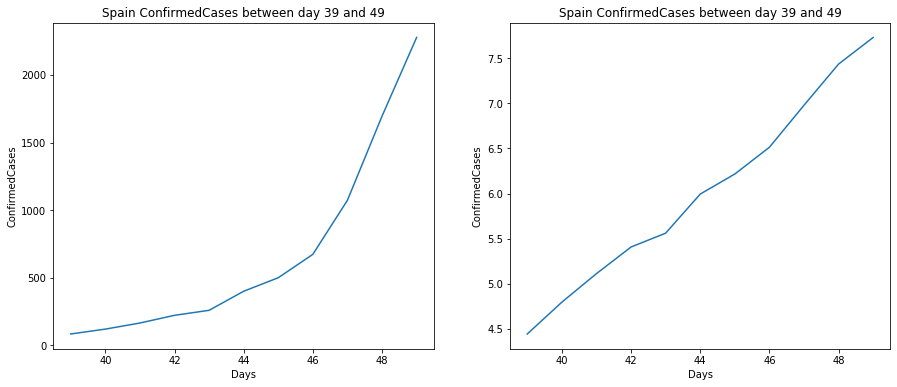

In [177]:

# plot 'Spain' covid-Confiremedcases graph between march 1 to march 11.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

###To do####  
ax1.plot(SpainMarch['Day_num'],SpainMarch['ConfirmedCases'])
ax1.
ax1.set_xlabel("Days")
ax1.set_ylabel("ConfirmedCases")
ax1.title.set_text('Spain ConfirmedCases between day 39 and 49')


## To do ###
##apply log transform to y variables ## 

ax2.plot(SpainMarch['Day_num'],np.log1p(SpainMarch['ConfirmedCases']))
ax2.set_xlabel("Days")
ax2.set_ylabel("ConfirmedCases")
ax2.title.set_text('Spain ConfirmedCases between day 39 and 49')








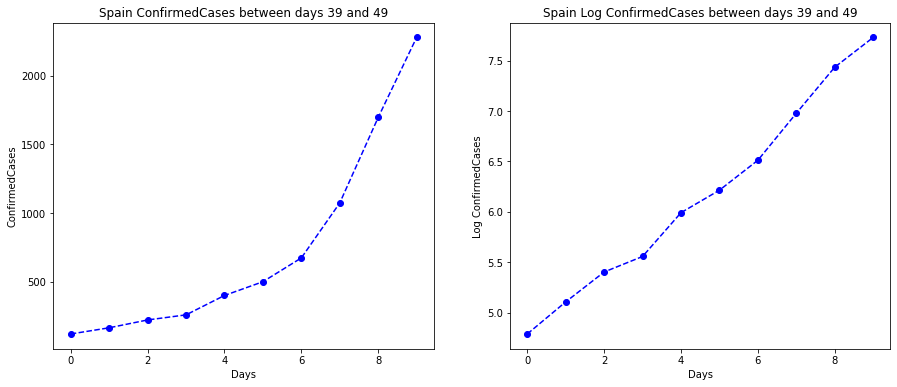

In [178]:
##don`t touch this cell##

# Filter selected features
data = all_data.copy()
features = ['Id', 'ForecastId', 'Country_Region', 'Province_State', 'ConfirmedCases', 'Fatalities', 
       'Day_num']
data = data[features]

# Apply log transformation to all ConfirmedCases and Fatalities columns, except for trends
data[['ConfirmedCases', 'Fatalities']] = data[['ConfirmedCases', 'Fatalities']].astype('float64')
data[['ConfirmedCases', 'Fatalities']] = data[['ConfirmedCases', 'Fatalities']].apply(lambda x: np.log1p(x))

# Replace infinites
data.replace([np.inf, -np.inf], 0, inplace=True)
data

,Id,ForecastId,Country_Region,Province_State,ConfirmedCases,Fatalities,Day_num
0,1.0,-1.0,0,83,0.0,0.0,0
1,2.0,-1.0,0,83,0.0,0.0,1
2,3.0,-1.0,0,83,0.0,0.0,2
3,4.0,-1.0,0,83,0.0,0.0,3
4,5.0,-1.0,0,83,0.0,0.0,4
...,...,...,...,...,...,...,...
35677,-1.0,13455.0,183,83,0.0,0.0,109
35678,-1.0,13456.0,183,83,0.0,0.0,110
35679,-1.0,13457.0,183,83,0.0,0.0,111
35680,-1.0,13458.0,183,83,0.0,0.0,112


### <br/>Problem 2-2  complete below function to  Split data into train/test and apply linear regression

In [232]:
#  Split data into train/test
def split_data(df, train_lim, test_lim):
    
    df.loc[df['Day_num']<=train_lim , 'ForecastId'] = -1
    df = df[df['Day_num']<=test_lim]
    
    ##To do ## for Train set 
    x_train=df[df['Day_num']<=train_lim]
    y_train=df[df['Day_num']<=train_lim]
    y_train_1=y_train['ConfirmedCases']
    y_train_2=y_train['Fatalities']

    ##To do ## for  Test set
    x_test=df[df['Day_num']<=test_lim]
    x_test=x_test[x_test['Day_num']>train_lim]

    # Clean Id columns and keep ForecastId as index
    x_train.drop('Id', inplace=True, errors='ignore', axis=1)
    x_train.drop('ForecastId', inplace=True, errors='ignore', axis=1)
    x_test.drop('Id', inplace=True, errors='ignore', axis=1)
    x_test.drop('ForecastId', inplace=True, errors='ignore', axis=1)
    
    return x_train, y_train_1, y_train_2, x_test #check to devide y_dataset 


# Linear regression model
def lin_reg(X_train, Y_train, X_test):
    ##To do ##   Create linear regression object
    regr = LinearRegression()
    

    ## To do ##  Train the model using the training sets
    regr.fit(X_train,Y_train)

    # To do ## Make predictions using the testing set
    y_pred = regr.predict(X_test)
    
    return regr, y_pred



In [233]:
##don`t touch this cell##
dates_list = ['2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09', 
                 '2020-03-10', '2020-03-11','2020-03-12','2020-03-13','2020-03-14','2020-03-15','2020-03-16','2020-03-17','2020-03-18',
                 '2020-03-19','2020-03-20','2020-03-21','2020-03-22','2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27', 
                 '2020-03-28', '2020-03-29', '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02', '2020-04-03', '2020-04-04', '2020-04-05', 
                 '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09', '2020-04-10', '2020-04-11', '2020-04-12', '2020-04-13', '2020-04-14','2020-04-15','2020-04-16','2020-04-17','2020-04-18','2020-04-19',
                '2020-04-20','2020-04-21','2020-04-22','2020-04-23','2020-04-24','2020-04-25','2020-04-26','2020-04-27','2020-04-28','2020-04-29','2020-04-30',
                '2020-05-01','2020-05-02','2020-05-03','2020-05-04','2020-05-05','2020-05-06','2020-05-07','2020-05-08','2020-05-09','2020-05-10','2020-05-11',
                '2020-05-12','2020-05-13','2020-05-14','2020-05-15']
def plot_linreg_basic_country(data, country_name, dates_list, day_start, shift, train_lim, test_lim):
    
    data_country = data[data['Country_Region']==country_dict[country_name]]
    data_country = data_country.loc[data_country['Day_num']>=day_start]
    X_train, Y_train_1, Y_train_2, X_test = split_data(data_country, train_lim, test_lim)
    model, pred = lin_reg(X_train, Y_train_1, X_test)

    # Create a df with both real cases and predictions (predictions starting on March 12th)
    X_train_check = X_train.copy()
    X_train_check['Target'] = Y_train_1

    X_test_check = X_test.copy()
    X_test_check['Target'] = pred

    X_final_check = pd.concat([X_train_check, X_test_check])

    # Select predictions from March 1st to March 25th
    predicted_data = X_final_check.loc[(X_final_check['Day_num'].isin(list(range(day_start, day_start+len(dates_list)))))].Target
    real_data = train.loc[(train['Country_Region']==country_name) & (train['Date'].isin(dates_list))]['ConfirmedCases']
    dates_list_num = list(range(0,len(dates_list)))

    # Plot results
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

    ax1.plot(dates_list_num, np.expm1(predicted_data))
    ax1.plot(dates_list_num, real_data)
    ax1.axvline(30-shift, linewidth=2, ls = ':', color='grey', alpha=0.5)
    ax1.legend(['Predicted cases', 'Actual cases', 'Train-test split'], loc='upper left')
    ax1.set_xlabel("Day count (from March " + str(1+shift) + " to March 25th)")
    ax1.set_ylabel("Confirmed Cases")

    ax2.plot(dates_list_num, predicted_data)
    ax2.plot(dates_list_num, np.log1p(real_data))
    ax2.axvline(30-shift, linewidth=2, ls = ':', color='grey', alpha=0.5)
    ax2.legend(['Predicted cases', 'Actual cases', 'Train-test split'], loc='upper left')
    ax2.set_xlabel("Day count (from March " + str(1+shift) + " to March 30th)")
    ax2.set_ylabel("Log Confirmed Cases")

    plt.suptitle(("ConfirmedCases predictions based on Log-Lineal Regression for "+country_name))

### <br/>Problem 2-3  using above function'plot_linreg_basic_country' run the Linear Regression workflow to Korea, South case
 - your completed graph doesn't have to be the same as the example.


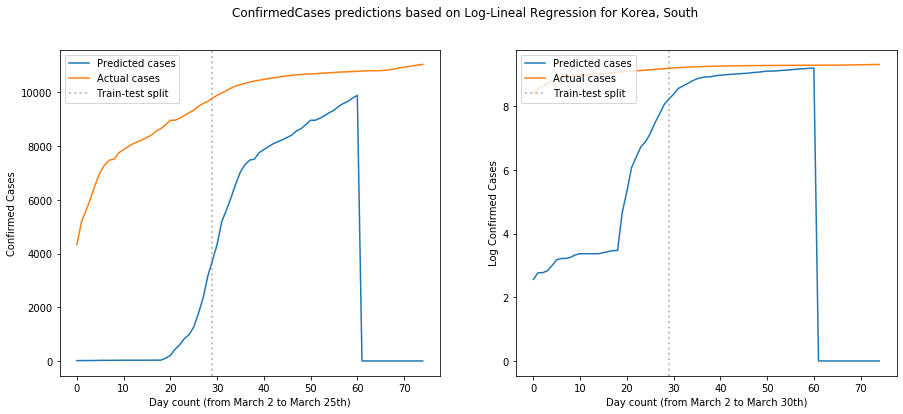

In [286]:
## To do ##  
dates_list2 = ['2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09', 
                 '2020-03-10', '2020-03-11','2020-03-12','2020-03-13','2020-03-14','2020-03-15','2020-03-16','2020-03-17','2020-03-18',
                 '2020-03-19','2020-03-20','2020-03-21','2020-03-22','2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27', 
                 '2020-03-28', '2020-03-29', '2020-03-30', '2020-03-31','2020-04-01', '2020-04-02', '2020-04-03', '2020-04-04', '2020-04-05', 
                 '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09', '2020-04-10', '2020-04-11', '2020-04-12', '2020-04-13', '2020-04-14','2020-04-15','2020-04-16','2020-04-17','2020-04-18','2020-04-19',
                '2020-04-20','2020-04-21','2020-04-22','2020-04-23','2020-04-24','2020-04-25','2020-04-26','2020-04-27','2020-04-28','2020-04-29','2020-04-30',
                '2020-05-01','2020-05-02','2020-05-03','2020-05-04','2020-05-05','2020-05-06','2020-05-07','2020-05-08','2020-05-09','2020-05-10','2020-05-11',
                '2020-05-12','2020-05-13','2020-05-14','2020-05-15']

plot_linreg_basic_country(data, 'Korea, South', dates_list2, 10, 1, 100, 6500)

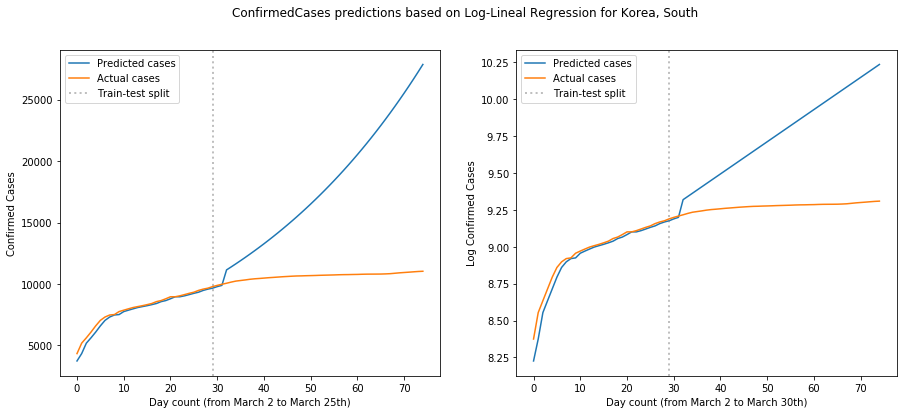

### <br/>Problem 2-4 Describe the significance and limitations of the graph above.

### YOUR ANSWER HERE ###

우선 그래프가 잘 그려지지 않은 것을 감안하고, 예시 그래프로 중요점과 한계를 설명한다면, 짧은 범위의 미래는 그럴듯하게 예측할 수 있지만, 먼 미래일수록 계속 이전의 추세를 따라가므로 실제 확진자와 큰 차이가 있다.

## 3. Caculating Stringency Indexes of six countries 

Reference : https://www.bsg.ox.ac.uk/sites/default/files/Calculation%20and%20presentation%20of%20the%20Stringency%20Index.pdf

Look at the document above and learn about Stringency Index (not legacy stringency index!!)

## 3-1 Data filtering

In [250]:
#load csv file you care ("OxCGRT_latest.csv")
###YOUR CODE HERE###
OxCGRT =pd.read_csv('data\OxCGRT_latest.csv')

In [251]:
#Filter rows with six unique countries by 'CountryName'
#('CountryName' == Australia, China, Japan, New Zealand, Singapore, South Korea)
###YOUR CODE HERE###
a=['Australia', 'China', 'Japan', 'New Zealand', 'Singapore', 'South Korea']
OxCGRT=OxCGRT[OxCGRT['CountryName'].isin(a)]
OxCGRT

,CountryName,CountryCode,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,...,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,M1_Wildcard,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,LegacyStringencyIndex,LegacyStringencyIndexForDisplay
947,Australia,AUS,20200101,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.00,0.0,0.00
948,Australia,AUS,20200102,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.00,0.0,0.00
949,Australia,AUS,20200103,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.00,0.0,0.00
950,Australia,AUS,20200104,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.00,0.0,0.00
951,Australia,AUS,20200105,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.00,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17720,Singapore,SGP,20200510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,22460.0,20.0,NaN,87.83,NaN,86.67
17721,Singapore,SGP,20200511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,23336.0,20.0,NaN,87.83,NaN,86.67
17722,Singapore,SGP,20200512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,23787.0,21.0,NaN,87.83,NaN,86.67
17723,Singapore,SGP,20200513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,24671.0,21.0,NaN,87.83,NaN,86.67


In [252]:
#Drop columns you don't need
#print dataframe you care about
###YOUR CODE HERE###
#use columns : 
"""
['CountryName', 'Date', 'C1_School closing', 'C1_Flag', 'C2_Workplace closing', 'C2_Flag', 'C3_Cancel public events','C3_Flag',
'C4_Restrictions on gatherings','C4_Flag','C5_Close public transport','C5_Flag','C6_Stay at home requirements','C6_Flag',
'C7_Restrictions on internal movement','C7_Flag','C8_International travel controls','H1_Public information campaigns','H1_Flag']
"""
OxCGRT=OxCGRT[['CountryName', 'Date', 'C1_School closing', 'C1_Flag', 'C2_Workplace closing', 'C2_Flag', 'C3_Cancel public events','C3_Flag',
'C4_Restrictions on gatherings','C4_Flag','C5_Close public transport','C5_Flag','C6_Stay at home requirements','C6_Flag',
'C7_Restrictions on internal movement','C7_Flag','C8_International travel controls','H1_Public information campaigns','H1_Flag']]

3번 문제 여기까지 했습니다!

## 3-2 Calculating Stringency Index

you can use some pakages to deal with 'nan' values

In [ ]:
#stringency calculation
#step1 : calculate weight for a policy of general scope
###YOUR CODE HERE###


In [ ]:
#step2 : calculate sub-indices
#calculate C1-C9, G1-G8, and I1-I9 
###YOUR CODE HERE###

In [ ]:
#step3 : calculate stringency index I (up to 2 decimal points)
###YOUR CODE HERE###

In [ ]:
#step4 : make your stingency index array into dataframe(column name = 'my_StringencyIndex') and concat it(axis = 1) to the result of 1-1 
###YOUR CODE HERE###

## Problem4. Topic Modeling (Clustering analysis of documents) for tweets related to COVID-19
A **topic model** is a type of statistical model for discovering the abstract "topics" that occur in a collection of documents.
 Please refer to [wikipedia](https://en.wikipedia.org/wiki/Topic_model#:~:text=In%20machine%20learning%20and%20natural,structures%20in%20a%20text%20body.) for detailed information.
- These documents were crawled from *twitter* with some *COVID-19* related keywords . All tweets are in English but have a lot of noisy information.
- In this problem, your goal is to cluster tweets according to the latent 'topics' with the statistical method, automatically. 


### Load the csv file using pandas library

In [256]:
df = pd.read_csv('../data/covid_twitter.csv') #set your working directory
text_en = df['text']
df

,Unnamed: 0,text
0,6,.@PatriceHarrisMD spoke with @YahooFinance abo...
1,14,#CoronaUpdate | Johns Hopkins University has s...
2,17,"Singapore donates 40,000 test kits to the Phil..."
3,28,"Lockdowns, drones: Will things ever go back to..."
4,30,Does the #COVID19 pandemic have you feeling ou...
...,...,...
36116,564058,Top public health officer says coming week a c...
36117,564096,Went for a run this evening...\nGod reminded m...
36118,564121,"Trump ~ Millions of face masks being made, tho..."
36119,564137,"For many students in our state, #COVID19 closu..."


### Problem 4-1 Text Preprocessing
First of all, you should process the documents so that the model will not be perturbed by the noisy information

**a. Remove the following characters with *'re'* module in each tweets**
- special characters ( # @ , . | ? ! )
- *COVID* relavant words (COVID19, coronavirus, coronaoutbreak)

In [270]:
### YOUR CODE HERE ###
df['text'] = df['text'].str.replace('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]', '')

df

,Unnamed: 0,text
0,6,PatriceHarrisMD spoke with YahooFinance about ...
1,14,CoronaUpdate Johns Hopkins University has sai...
2,17,Singapore donates 40000 test kits to the Phili...
3,28,Lockdowns drones Will things ever go back to n...
4,30,Does the COVID19 pandemic have you feeling out...
...,...,...
36116,564058,Top public health officer says coming week a c...
36117,564096,Went for a run this evening\nGod reminded me t...
36118,564121,Trump Millions of face masks being made thous...
36119,564137,For many students in our state COVID19 closure...


**b. Remove the *stop words* in each tweets**

*Stop words* are words which should be filtered out before given to the model. Please refer to [wikipedia](https://en.wikipedia.org/wiki/Stop_words#:~:text=In%20SEO%20terminology%2C%20stop%20words,save%20space%20in%20their%20databases.) for detailed information 
- First, you should download the stop word set from *nltk* module.

In [271]:
### NLP toolkit ###
import nltk
from nltk.corpus import stopwords

In [272]:
### Download the set with this
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hyuna\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [273]:
### check the set with this
stop_words = set(stopwords.words('english'))
print(stop_words)

{'doesn', 'where', 'between', 'those', "hasn't", 'then', "weren't", 'few', 'won', "shouldn't", 'he', 'own', 'under', 'haven', 'wasn', 'who', 'and', 'during', 'as', 'these', 'out', 'while', 'in', 'nor', 'not', 'y', 'herself', 'me', 'just', 'some', 'up', "shan't", 'why', 'our', 'mightn', 'so', 'does', 'their', 'doing', "you've", 'her', 'them', 'this', 'himself', 'a', 'above', "mightn't", 'needn', 'down', 'aren', 'to', 'couldn', "didn't", 'below', 'at', 'that', 'hadn', "aren't", 'yourselves', 'don', 'what', 'i', 'with', 'ain', 'how', 'any', 'hasn', 'once', 'did', "doesn't", 'wouldn', "you're", 'both', 've', 'here', "hadn't", 'through', 'ourselves', 'mustn', 'yours', 'into', 'o', 'can', "isn't", 'an', 'its', 'should', 't', 'm', 'be', "wasn't", 'only', 'which', 'him', "you'd", 'she', 'about', 'from', 'but', 'such', "needn't", 'for', 'my', 'off', 'are', 'didn', 'isn', 'you', 'there', "won't", 'his', "she's", 'most', "couldn't", 'over', "should've", 'by', 'very', 'itself', 'ours', 'hers', 'to

**a. Update your set with some stop words which are not needed for modeling, you think.**

In [274]:
### YOUR CODE HERE ###
stop_words.add(':)')
stop_words.add('kkk')

**b. Remove stop words from the tweet dataset with your own stop words set**

In [279]:
### YOUR CODE HERE ###


### Problem 4-2 Convert the documents to a tf-idf matrix 
*TF-IDF* is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. Please refer to [this](http://mlwiki.org/index.php/TF-IDF)
- Please use the results of 4-1
- First, transform your tweets dataset into tf-idf matrix using the module below
- Print your tf-idf matrix after converting it into *pandas.DataFrame* format
- Set your own hyperparams.

In [ ]:
### scikit learn ###
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
### YOUR CODE HERE ###


### Problem 4-3 Cluster the tf-idf matrix of tweets using the *K-Means* algorithm.
- Set your own hyperparams

In [ ]:
### scikit learn ###
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

**a. Find an optimal value for the number of clusters using the *elbow method***
- Draw the plot for SSD(Sum of the Squared Distance) of *K-Means* algorithm by the number of clusters, K, as shown in the example


Example
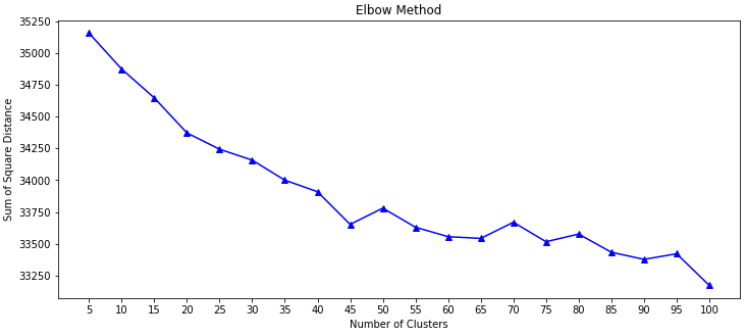

In [ ]:
### YOUR CODE HERE ###


**b. Based on the your plot above, pick a proper value for K and justify why.**

It is OK that you can't find any proper value for K. If not, specify why these are not proper.

**### YOUR DESCRIPTION HERE ###**
 
 

### Problem 4-4 Visualize your clusters to evaluate the results of clustering analysis.

**a. Assgin the cluster index for each tweet with K=14**
- In other words, predict the label for each example

In [ ]:
### YOUR CODE HERE ###

**b. Fill the function in below, which visualizes your clusters with PCA and TSNE**

Both *PCA* and *TSNE* are the most common visualization techniques in the machine learning community. It is usually known that TSNE could capture the non-linear relationship between datapoints than PCA. For more detailed information, please refer to [this](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding)
- At first, this function randomly selects some samples for fitting PCA, depending on your device's capability.
- Get the PCA matrices from the results of 4-2(tf-idf matrix) where the number of principal components is 2, each.
- If you are uncomfortable with this function, you can make your own function to accomplish the same goal with this.

Example
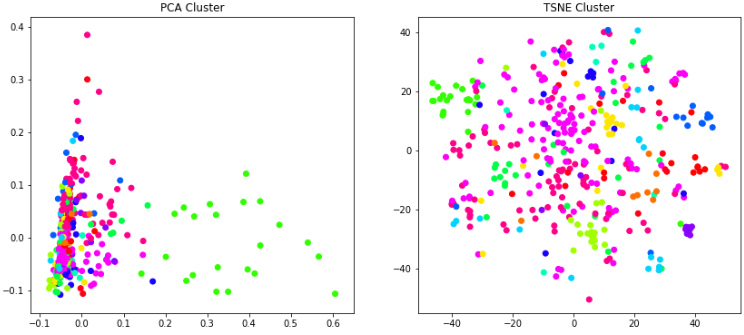

In [ ]:
### visualization methods ###
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
### for plotting ###
import matplotlib.cm as cm

In [ ]:
def plot_tsne_pca(data, labels):
    '''
    This function plots the PCA and t-SNE on 2D plane.
    args:
        data: tf-idf weight matrix
        labels: predictions from K-means
    '''
    # initial set up and random pick up samples
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=2000, replace=False)
    
    ######################## YOUR CODE HERE ########################
    '''
    pca (2000 x 2) : extract 2 eigenvectors that have the most explained variance
    tsne (2000 x 2) : feed the 50 principal components to t-SNE
                     For TSNE, you can use the TSNE().fit_transform() function.
    '''
    
    pca = 
    tsne =  
    
    #################################################################
    
    # random pick certain size of data points for visiualization
    idx = np.random.choice(range(pca.shape[0]), size=400, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    # plot PCA
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster')
    
    # plot t-SNE
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster')

In [ ]:
### YOUR CODE HERE ###
# plot PCA and t-SNE reduced data with above function
plot_tsne_pca( , )

### Problem 4-5 Extract keywords from each clusters

**a. get the top keywords from each cluster you've got from 4-4 (a.), based on the tf-idf matrix values**

- Use the function in below or make your own function to achieve the same goal with this function.

Example
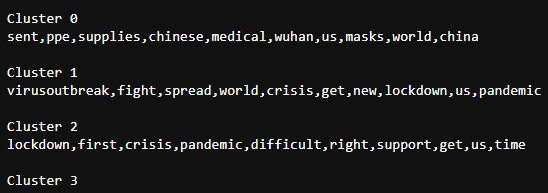

In [ ]:
def get_top_keywords(data, clusters, labels, n_terms=10):
    '''
    This function displays the top keywords based on tf-idf score.
    data = tf-idf array
    clusters = assigned cluster index
    labels = vectorizer.get_feature_names()
    n_terms = top n keywords
    '''
    #  based on predictions
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    # loop through each clusters and print top 10 score words
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))

In [ ]:
### YOUR CODE HERE ###


**b. According to the keywords selected from (a.), describe the differences between clusters or guess the topic of tweets in the specific cluster**

**### YOUR DESCRIPTION HERE ###**

### End of HW4 ###
Thanks for all your works